In [13]:
from commons import *

In [3]:
# read in data
df = pd.read_csv("data/runtimes/runtimes_atomic_nooutliers.csv")
df["applicationtimeperunit"] = df["applicationtime"] / df["applicationsize"]
df = df[df["applicationtimeperunit"] < np.inf]

/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
algorithms = pd.unique(df["algorithm"])
datasets = pd.unique(df["openmlid"])[:20]

In [5]:

#dfSuccesses1h = pd.read_csv("data/results/F-successruns-vanilla-1h.csv", delimiter=";")
dfFails1h = pd.read_csv("data/results/F-failedruns-1h.csv", delimiter=";")
dfFails1d = pd.read_csv("data/results/F-failedruns-24h.csv", delimiter=";")
dfAvoided = pd.read_csv("data/results/F-avoidance.csv", delimiter=";")


In [17]:
datasets = dfSuccesses1h["dataset"].values

In [16]:
dsShortcuts = {
    "mnistrotationbackimagenew": "mnistrot"
}

# Paper Plots

## Avoided Executions

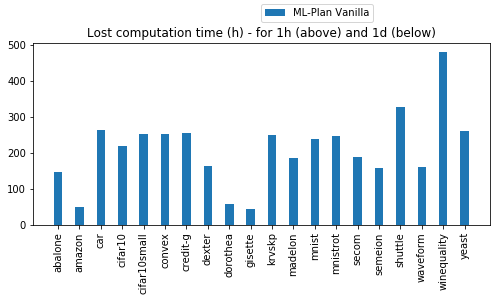

In [133]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(7, 4))
ind = np.arange(len(datasets))
width = 0.4
a = ax
a.bar(ind, dfAvoided["n_guarded"], width=width)
a.set_title("Lost computation time (h) - for 1h (above) and 1d (below)")
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels([dsShortcuts[d] if d in dsShortcuts else d for d in datasets], rotation=90)
lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/avoidances.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Wasted Time

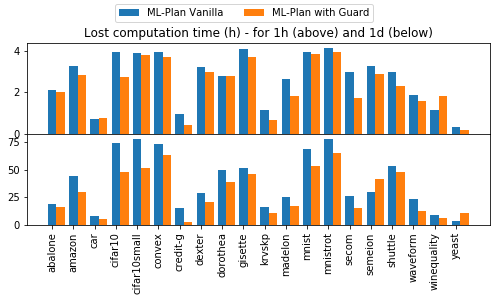

In [134]:
##### Create plot for the saved time

# setup dummy values for the lost time
failTimeVanilla1h = dfFails1h["timeouts_vanilla"].values
failTimeGuarded1h = dfFails1h["timeouts_guarded"].values
failTimeVanilla1d = dfFails1d["timeouts_vanilla"].values
failTimeGuarded1d = dfFails1d["timeouts_guarded"].values
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 4))
ind = np.arange(len(datasets))
width = 0.4
a = ax[0]
a.bar(ind, failTimeVanilla1h * 5 / 60, width=width)
a.bar(ind + width, failTimeGuarded1h  * 5 / 60, width=width)
a.set_title("Lost computation time (h) - for 1h (above) and 1d (below)")
#a.set_yscale("log")
#a.set_ylim([-.3, 1])
a = ax[1]
a.bar(ind, failTimeVanilla1d * 20 / 60, width=width)
a.bar(ind + width, failTimeGuarded1d  * 20 / 60, width=width)
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels([dsShortcuts[d] if d in dsShortcuts else d for d in datasets], rotation=90)
lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/wastedtimes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Successful Runs

In [63]:
TEMPLATE = '''{\\sc Abalone} &  \\bf 73.32 $\\pm$ 0.76& {abalone_guarded} & \\underline{73.34 $\\pm$ 0.60} & {abalone_vanilla} \\\\
{\\sc Amazon} & \\bf 27.44 $\\pm$ 2.05 & {amazon_guarded}& \\bf 27.44 $\\pm$ 2.05 & {amazon_vanilla}\\\\
{\\sc Car} & \\bf 0.75 $\\pm$ 0.61 & {car_guarded} & \\underline{0.87 $\\pm$ 0.75} & {car_vanilla}\\\\
{\\sc Cifar10} & \\bf 59.97 $\\pm$ 1.79& {cifar10_guarded} & 67.61 $\\pm$ 2.87 & {cifar10_vanilla}\\\\
{\\sc Cifar10small} & 62.02 $\\pm$ 2.32& {cifar10small_guarded} & \\bf 58.45 $\\pm$ 0.64 & {cifar10small_vanilla}\\\\
{\\sc Convex} & \\bf 17.03 $\\pm$ 1.95& {convex_guarded}& \\underline{18.4 $\\pm$ 4.60} & {convex_vanilla}\\\\
{\\sc Credit-g} & \\bf 24.7 $\\pm$ 1.42& {credit-g_guarded}& \\underline{24.8 $\\pm$ 1.74} & {credit-g_vanilla}\\\\
{\\sc Dexter} & \\underline{7.50 $\\pm$ 1.52}& {dexter_guarded}& \\bf 6.39 $\\pm$ 1.67 & {dexter_vanilla}\\\\
{\\sc Dorothea} & \\bf 7.04 $\\pm$ 1.00& {dorothea_guarded}& \\underline{7.18 $\\pm$ 0.68}& {dorothea_vanilla}\\\\
{\\sc Gisette} & \\bf 3.00 $\\pm$ 0.63 & {gisette_guarded}& \\underline{3.01 $\\pm$ 0.42} & {gisette_vanilla}\\\\
{\\sc Krvskp} & \\bf 0.47 $\\pm$ 0.18& {krvskp_guarded}& \\underline{0.64 $\\pm$ 0.18}&{krvskp_vanilla}\\\\
{\\sc Madelon} & \\bf 21.87 $\\pm$ 3.25& {madelon_guarded} & \\underline{23.62 $\\pm$ 2.91}& {madelon_vanilla}\\\\
{\\sc Mnist} & 5.22 $\\pm$ 0.96& {mnist_guarded} & \\bf 3.48 $\\pm$ 0.09 & {mnist_vanilla}\\\\
{\\sc Mnistrot} & \\bf 58.92 $\\pm$ 4.79& {mnistrotationbackimagenew_guarded} & 68.03 $\\pm$ 0.77 &  {mnistrotationbackimagenew_vanilla}\\\\
{\\sc Secom} & \\bf 6.71 $\\pm$ 0.11 & {secom_guarded} & \\underline{6.72  $\\pm$ 0.10} & {secom_vanilla}\\\\
{\\sc Semeion} & \\underline{5.63 $\\pm$ 1.58}& {semeion_guarded} & \\bf 5.59 $\\pm$ 1.64 & {semeion_vanilla}\\\\
{\\sc Shuttle} & \\underline{0.02 $\\pm$ 0.01}& {shuttle_guarded} & \\bf 0.01 $\\pm$ 0.01 & {shuttle_vanilla}\\\\
{\\sc Waveform} & \\underline{12.83 $\\pm$ 0.62} & {waveform_guarded}& \\bf 12.82 $\\pm$ 0.56 & {waveform_vanilla}\\\\
{\\sc Winequality} & \\bf 33.07 $\\pm$ 0.80& {winequality_guarded} & \\underline{33.1 $\\pm$ 1.04} & {winequality_vanilla}\\\\
{\\sc Yeast} & \\underline{40.16 $\\pm$ 1.70}& {yeast_guarded} & \\bf 39.78 $\\pm$ 1.68 &{yeast_vanilla}\\\\'''

{\sc Abalone} &  \bf 73.32 $\pm$ 0.76& \underline{254.2} & \underline{73.34 $\pm$ 0.60} & \bf 262.0 \\
{\sc Amazon} & \bf 27.44 $\pm$ 2.05 & \bf 86.6& \bf 27.44 $\pm$ 2.05 & 77.6\\
{\sc Car} & \bf 0.75 $\pm$ 0.61 & 1874.56 & \underline{0.87 $\pm$ 0.75} & \bf 3213.9\\
{\sc Cifar10} & \bf 59.97 $\pm$ 1.79& \bf 38.0 & 67.61 $\pm$ 2.87 & 21.9\\
{\sc Cifar10small} & 62.02 $\pm$ 2.32& \bf 57.0 & \bf 58.45 $\pm$ 0.64 & 42.1\\
{\sc Convex} & \bf 17.03 $\pm$ 1.95& \bf 58.1& \underline{18.4 $\pm$ 4.60} & 33.4\\
{\sc Credit-g} & \bf 24.7 $\pm$ 1.42& \underline{13014.4}& \underline{24.8 $\pm$ 1.74} & \bf 14319.4\\
{\sc Dexter} & \underline{7.50 $\pm$ 1.52}& \bf 151.5& \bf 6.39 $\pm$ 1.67 & 129.0\\
{\sc Dorothea} & \bf 7.04 $\pm$ 1.00& \bf 59.8& \underline{7.18 $\pm$ 0.68}& 52.33\\
{\sc Gisette} & \bf 3.00 $\pm$ 0.63 & \bf 65.11& \underline{3.01 $\pm$ 0.42} & 55.8\\
{\sc Krvskp} & \bf 0.47 $\pm$ 0.18& 1023.8& \underline{0.64 $\pm$ 0.18}&\bf 1209.4\\
{\sc Madelon} & \bf 21.87 $\pm$ 3.25& \bf 249.0 &

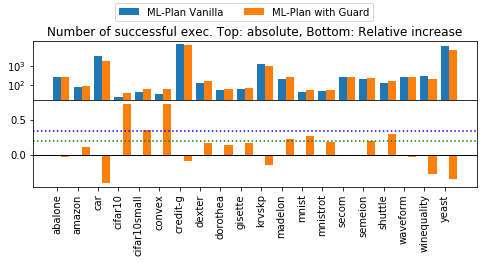

In [65]:
##### Create plot for the saved time

dfSuccesses1h = pd.read_csv("data/results/F-successruns-1h.csv", delimiter=";")
dfSuccesses1d = pd.read_csv("data/results/F-successruns-24h.csv", delimiter=";")

templateInstance = "" + TEMPLATE
    
# setup dummy values for the lost time
successesVanilla1h = dfSuccesses1h["n_vanilla"].values
successesGuarded1h = dfSuccesses1h["n_guarded"].values
for i, vv in enumerate(succTimeVanilla1h):
    vg = np.round(successesGuarded1h[i], 2)
    vv = np.round(vv, 2)
    templateInstance = templateInstance.replace("{" + datasets[i] + "_guarded}", (str(vg) if vg < vv * .9 else ("\\underline{" + str(vg) + "}") if vg < vv else "\\bf " + str(vg)))
    templateInstance = templateInstance.replace("{" + datasets[i] + "_vanilla}", (str(vv) if vv < vg * .9 else ("\\underline{" + str(vv) + "}") if vv < vg else "\\bf " + str(vv)))
    #print(datasets[i] + ": " + str() + " vs " + str(np.round(v, 2)))
print(templateInstance)

#succTimeVanilla1d = dfSuccesses1d["timeouts vanilla"].values
#succTimeGuarded1d = dfSuccesses1d["timeouts sg"].values
fig, ax = plt.subplots(2, 1, figsize=(7, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
ind = np.arange(len(datasets))
width = 0.4
a = ax[0]
a.set_title("Number of successful exec. Top: absolute, Bottom: Relative increase")
a.bar(ind, successesVanilla1h, width=width)
a.bar(ind + width, successesGuarded1h, width=width)
a.set_yscale("log")
a.set_yticks([100, 1000])
a = ax[1]
avgSuccImprovements1h = (succTimeGuarded1h - successesVanilla1h) / successesVanilla1h
a.bar(ind, np.zeros(len(avgSuccImprovements1h)), width=width)
a.bar(ind + width, avgSuccImprovements1h, width=width)

#a.axhline(np.mean(avgImprovements1h[succTimeVanilla1h < 500]), linewidth=1, color="blue", linestyle="--", label="_nolegend_")
avgSuccEvaluation120mean = np.mean(avgSuccImprovements1h[successesVanilla1h < 120])
avgSuccEvaluation300mean = np.mean(avgSuccImprovements1h[successesVanilla1h < 300])
print(avgSuccEvaluation120mean)
print(avgSuccEvaluation300mean)
a.axhline(avgSuccEvaluation120mean, linewidth=1.5, color="blue", linestyle="dotted", label="_nolegend_")
a.axhline(avgSuccEvaluation300mean, linewidth=1.5, color="green", linestyle="dotted", label="_nolegend_")
a.axhline(0, linewidth=1, color="black", linestyle="-", label="_nolegend_")
#a.bar(ind + width, succTimeGuarded1h, width=width)
#a.set_yscale("log")
#a.set_ylim([0, 1])
#a.bar(ind, succTimeVanilla1d, width=width)
#a.bar(ind + width, succTimeGuarded1d, width=width)
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels([dsShortcuts[d] if d in dsShortcuts else d for d in datasets], rotation=90)
lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/successes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Success Times

                      dataset    t_vanilla    t_guarded
0                     abalone  1042.080383  1010.564567
1                      amazon   684.526983   798.069850
2                         car  1761.889667  1365.703500
3                     cifar10   205.446593   319.543518
4                cifar10small   307.995583   453.927797
5                      convex   352.494667   466.415433
6                    credit-g  1488.302983  1930.566067
7                      dexter   965.340750  1038.849200
8                    dorothea   675.855963   722.728417
9                     gisette   375.628915   493.257463
10                     krvskp  1222.688633  1396.502767
11                    madelon  1163.639000  1431.205250
12                      mnist   316.177700   425.077567
13  mnistrotationbackimagenew   279.457367   330.231900
14                      secom  1013.377200  1190.773648
15                    semeion   963.504317  1076.581000
16                    shuttle   751.383517   885

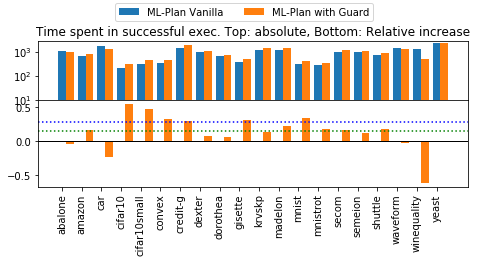

In [66]:
##### Create plot for the saved time
dfSuccessTimes1h = pd.read_csv("data/results/F-successtimes-1h.csv", delimiter=";")

# setup dummy values for the lost time
succTimesVanilla1h = dfSuccessTimes1h["t_vanilla"].values
succTimesGuarded1h = dfSuccessTimes1h["t_guarded"].values
print(dfSuccessTimes1h)
for v in succTimesGuarded1h:
    print(np.round(v, 2))
print(succTimesVanilla1h)
#succTimeVanilla1d = dfSuccesses1d["timeouts vanilla"].values
#succTimeGuarded1d = dfSuccesses1d["timeouts sg"].values
fig, ax = plt.subplots(2, 1, figsize=(7, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
ind = np.arange(len(datasets))
width = 0.4
a = ax[0]
a.set_title("Time spent in successful exec. Top: absolute, Bottom: Relative increase")
a.bar(ind, succTimesVanilla1h, width=width)
a.bar(ind + width, succTimesGuarded1h, width=width)
a.set_yscale("log")
a.set_yticks([10, 100, 1000])
a = ax[1]
avgSuccTimesImprovements1h = (succTimesGuarded1h - succTimesVanilla1h) / succTimesVanilla1h
print(avgSuccTimesImprovements1h)
a.bar(ind, np.zeros(len(avgSuccTimesImprovements1h)), width=width)
a.bar(ind + width, avgSuccTimesImprovements1h, width=width)
#a.axhline(np.mean(avgImprovements1h[succTimeVanilla1h < 500]), linewidth=1, color="blue", linestyle="--", label="_nolegend_")
avgSuccTimes120mean = np.mean(avgSuccTimesImprovements1h[successesVanilla1h < 120])
avgSuccTimes300mean = np.mean(avgSuccTimesImprovements1h[successesVanilla1h < 300])
#print(", ".join(["{\sc " + d + "}" for d in datasets[succTimeVanilla1h < 300] if not d in datasets[succTimeVanilla1h < 120]]))
print(avgSuccTimes120mean)
print(avgSuccTimes300mean)
a.axhline(avgSuccTimes120mean, linewidth=1.5, color="blue", linestyle="dotted", label="_nolegend_")
a.axhline(avgSuccTimes300mean, linewidth=1.5, color="green", linestyle="dotted", label="_nolegend_")
a.axhline(0, linewidth=1, color="black", linestyle="-", label="_nolegend_")
#a.bar(ind + width, succTimeGuarded1h, width=width)
#a.set_yscale("log")
#a.set_ylim([0, 1])
#a.bar(ind, succTimeVanilla1d, width=width)
#a.bar(ind + width, succTimeGuarded1d, width=width)
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels([dsShortcuts[d] if d in dsShortcuts else d for d in datasets], rotation=90)
lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/successtimes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Gibt es Situationen, wo ein PP schon den timeout bewirkt und trotzdem mehrfach ausgewertet wird?

## gibt es algos die in default-config gelaufen sind und noch mal so im meta-learner probiert wurden?

In [84]:
for algo in algorithms:
    print(algo)
    dfAlgo = dfAnalysisConvex[(dfAnalysisConvex["ci"].str.lower().str.contains(algo))]
    dfAlgo = dfAlgo[~dfAlgo["ci"].str.contains("pipeline")] # ignore pre-processing for now
    dfAlgoBase = dfAlgo[~dfAlgo["ci"].str.contains("meta")]
    dfAlgoMeta = dfAlgo[dfAlgo["ci"].str.contains("meta")]
    if len(dfAlgoBase) > 0:
        jsons = dfAlgoBase["ci"].values
        for json in jsons:
            print(ast.literal_eval(json))

bayesnet
{'component': {'name': 'weka.classifiers.bayes.BayesNet'}, 'satisfactionOfRequiredInterfaces': {}, 'parameterValues': {'Q': 'weka.classifiers.bayes.net.search.local.K2', 'D': 'false'}}
{'component': {'name': 'weka.classifiers.bayes.BayesNet'}, 'satisfactionOfRequiredInterfaces': {}, 'parameterValues': {'Q': 'weka.classifiers.bayes.net.search.local.LAGDHillClimber', 'D': 'false'}}
{'component': {'name': 'weka.classifiers.bayes.BayesNet'}, 'satisfactionOfRequiredInterfaces': {}, 'parameterValues': {'Q': 'weka.classifiers.bayes.net.search.local.TabuSearch', 'D': 'false'}}
{'component': {'name': 'weka.classifiers.bayes.BayesNet'}, 'satisfactionOfRequiredInterfaces': {}, 'parameterValues': {'Q': 'weka.classifiers.bayes.net.search.local.HillClimber', 'D': 'true'}}
{'component': {'name': 'weka.classifiers.bayes.BayesNet'}, 'satisfactionOfRequiredInterfaces': {}, 'parameterValues': {'Q': 'weka.classifiers.bayes.net.search.local.SimulatedAnnealing', 'D': 'false'}}
{'component': {'name'

In [71]:
for algo in algorithms:
    dfAlgo = dfAnalysisConvex[(dfAnalysisConvex["ci"].str.lower().str.contains(algo))]
    dfAlgo = dfAlgo[~dfAlgo["ci"].str.contains("pipeline")] # ignore pre-processing for now
    dfAlgoBase = dfAlgo[~dfAlgo["ci"].str.contains("meta")]
    dfAlgoMeta = dfAlgo[dfAlgo["ci"].str.contains("meta")]
    print(dfAlgoBase)

       status                                                 ci  \
53    success  {"component":{"name":"weka.classifiers.bayes.B...   
54  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
55  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
56  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
57  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
58  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
62    success  {"component":{"name":"weka.classifiers.bayes.B...   
63  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   
64  safeguard  {"component":{"name":"weka.classifiers.bayes.B...   

                 result                  thread  
53   0.5057002111189304  ORGraphSearch-worker-6  
54  Prevented execution  ORGraphSearch-worker-6  
55  Prevented execution  ORGraphSearch-worker-6  
56  Prevented execution  ORGraphSearch-worker-6  
57  Prevented execution  ORGraphSearch-worker-6  
58  Prevented execu

[ 1.98500e+01  1.79000e+01  3.27490e+03  4.02220e+00  1.48000e+01
  8.46670e+00 -6.88480e+03  6.60000e+00  1.18000e+01  7.04440e+00
  5.77111e+01  1.24500e+01  1.62444e+01  1.20444e+01  4.24000e+01
  2.50222e+01  9.82220e+00  3.80667e+01  1.90667e+01  1.01745e+03]


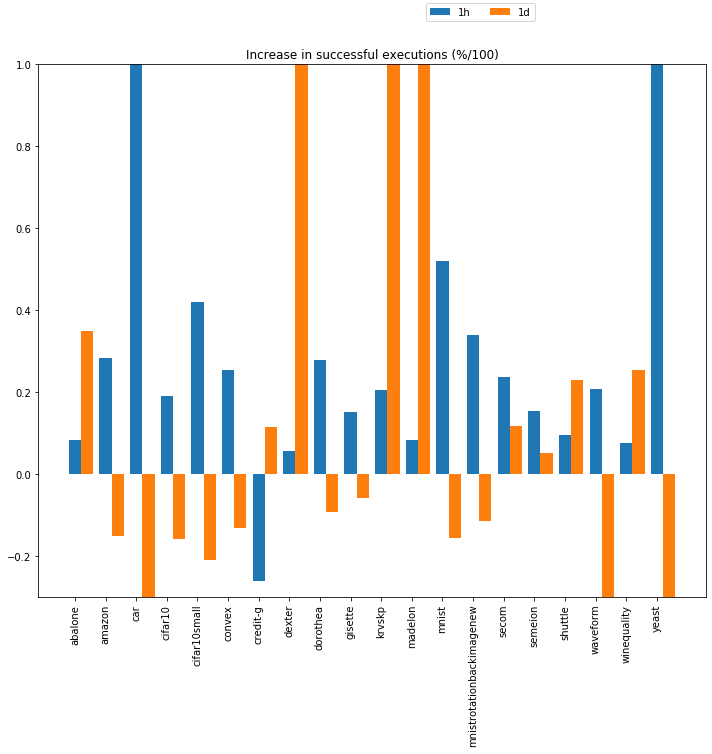

In [38]:
##### Create plot for the saved time

# setup dummy values for the lost time
succTimeVanilla1h = dfSuccesses1h["successs vanilla"].values
succTimeVanilla1d = dfSuccesses24h["success vanilla"].values
succTimeGuarded1h = dfSuccesses1h["successs sg"].values
succTimeGuarded1d = dfSuccesses24h["success sg"].values

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,10))
ind = np.arange(len(datasets))
width = 0.4
a = ax
a.bar(ind, (succTimeGuarded1h - succTimeVanilla1h) / succTimeVanilla1h, width=width)
print(succTimeGuarded1h - succTimeVanilla1h)
a.bar(ind + width, (succTimeGuarded1d - succTimeVanilla1d) / succTimeVanilla1d, width=width)
a.set_title("Increase in successful executions (%/100)")
#a.set_yscale("log")
a.set_ylim([-.3, 1])
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels(datasets, rotation=90)
lgd = fig.legend(["1h", "1d"], bbox_to_anchor=(0.75, 1.05), ncol=2)
fig.tight_layout()
fig.savefig("plots/wastedtimes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()